# NLP Assignment - Twitter US Airline Sentiment

#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.



In [ ]:
# install and import necessary libraries.

!pip install contractions
!pip install BeautifulSoup

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

  Using cached https://files.pythonhosted.org/packages/40/f2/6c9f2f3e696ee6a1fb0e4d7850617e224ed2b0b1e872110abffeca2a09d4/BeautifulSoup-3.2.2.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
project_path = '/content/drive/My Drive/Colab/dataset/'

In [ ]:
dataset_file = project_path + 'tweets.csv'

In [ ]:
# reading the dataset
tdata = pd.read_csv(dataset_file)

In [ ]:
tdata.shape                                               

(14640, 15)

In [ ]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tdata.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [ ]:
tdata.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
tdata.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Drop all other columns except “text” and “airline_sentiment”

tdata = tdata.drop(['tweet_id', 'tweet_location','airline_sentiment_confidence','name','negativereason_gold','negativereason_gold','retweet_count', 'negativereason_confidence','airline', 'negativereason', 'airline_sentiment_gold','tweet_created','user_timezone', 'tweet_coord'], axis=1)

In [ ]:
# Check first 5 rows of data
pd.set_option('display.max_colwidth', None) 
tdata.head()                                 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [ ]:
tdata.groupby('airline_sentiment').count()

,text
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [ ]:
# Shape of data
tdata.shape                                

(14640, 2)

### Text pre-processing: Data preparation. 

1. Html tag removal 
2. Tokenization 
3. Remove the numbers. 
4. Removal of Special Characters and Punctuations. 
5. Removal of stopwords 
6. Conversion to lowercase. 
7. Lemmatize or stemming. 
8. Join the words in the list to convert back to text string in the data frame



## 1) html tag removal

In [ ]:

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

tdata['text'] = tdata['text'].apply(lambda x: strip_html(x))
tdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


## Remove Numbers


In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

tdata['text'] = tdata['text'].apply(lambda x: remove_numbers(x))
tdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


## Replace contractions in string of text

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

tdata['text'] = tdata['text'].apply(lambda x: replace_contractions(x))
tdata.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


## Function to remove mentions(@)

In [ ]:
def remove_mentions(text):
    return ' '.join(text for text in text.split(' ') if not text.startswith('@'))

tdata['text'] = tdata['text'].apply(lambda x: remove_mentions(x))
tdata.head()

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you have added commercials to the experience... tacky.
2,neutral,I did not today... Must mean I need to take another trip!
3,negative,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,and it is a really big bad thing about it


## Tokenization

In [ ]:
tdata['text'] = tdata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
tdata.head()

,airline_sentiment,text
0,neutral,"[What, said, .]"
1,positive,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[and, it, is, a, really, big, bad, thing, about, it]"


## Set custom stop-word


In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

## Word Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tdata['text'] = tdata.apply(lambda row: normalize(row['text']), axis=1)
tdata.head()

,airline_sentiment,text
0,neutral,say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


### Vectorization using TFID Vectorizer.

In [ ]:
# Vectorization using CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
tdata_features = vectorizer.fit_transform(tdata['text'])

tdata_features = tdata_features.toarray()                        # Convert the data features to array.

In [ ]:
tdata_features.shape

(14640, 1000)

In [ ]:
labels = tdata['airline_sentiment']
#labels = labels.astype('object')

# Split data into training and testing set (70/30)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tdata_features, labels, test_size=0.3, random_state=7)

# Build  The Model (Random Forest)


In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(x_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, tdata_features, labels, cv=50)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7461124877273364


### Predict the result for test data using the model built above.

In [ ]:
result = forest.predict(x_test)

### Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.


[[2428  242  114]
 [ 380  453   97]
 [ 180  118  380]]


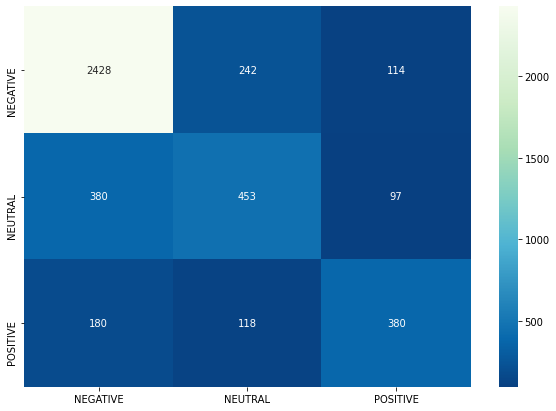

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['NEGATIVE','NEUTRAL','POSITIVE']],
                  columns = [i for i in ['NEGATIVE','NEUTRAL','POSITIVE']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap=plt.cm.GnBu_r)

### Vectorization using TFID Vectorizer.

In [ ]:
# Vectorization using TFID Vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
tdata_features = vectorizer.fit_transform(tdata['text'])

tdata_features = tdata_features.toarray()

tdata_features.shape

(14640, 1000)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tdata_features, labels, test_size=0.3, random_state=7)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(x_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, tdata_features, labels, cv=50)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7560194492496143


In [ ]:
result = forest.predict(x_test)

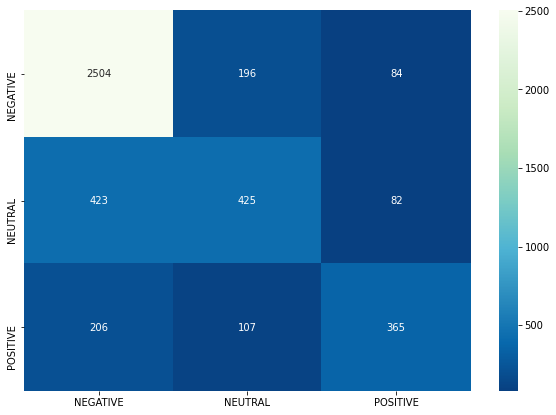

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat1 = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat1, index = [i for i in ['NEGATIVE','NEUTRAL','POSITIVE']],
                  columns = [i for i in ['NEGATIVE','NEUTRAL','POSITIVE']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap=plt.cm.GnBu_r)

# Positive Vs Negative words Graph

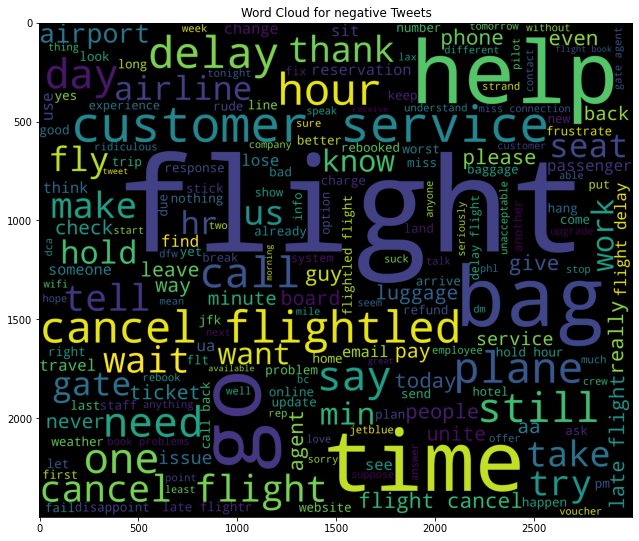

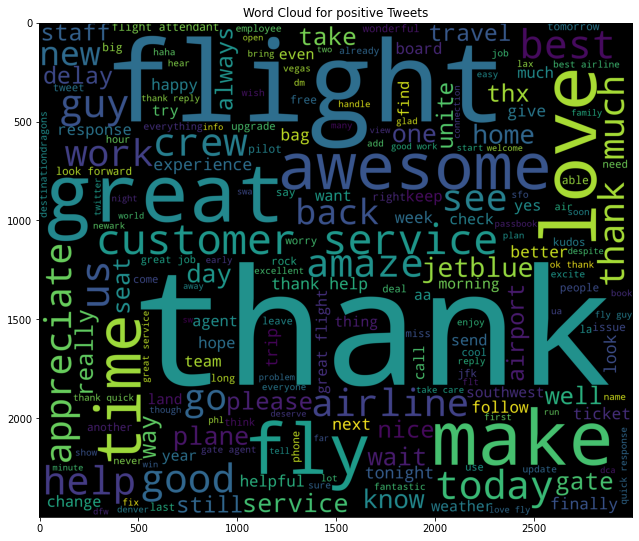

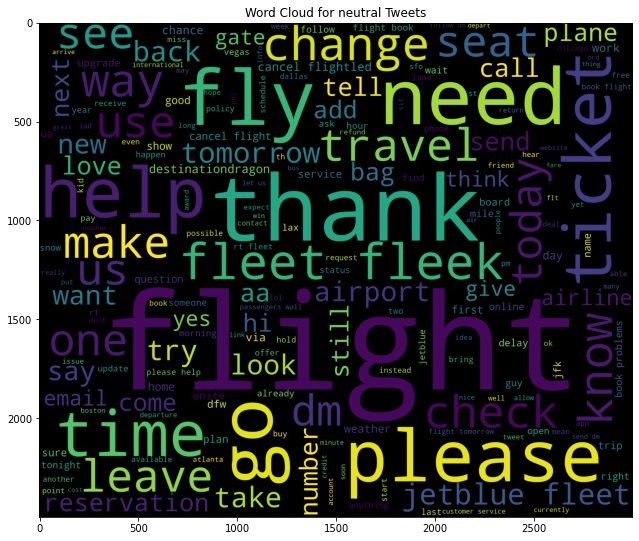

In [ ]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud_show(df):
    words = ' '.join(df['text'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(cleaned_word)
    return wordcloud
wordcloud_negative=wordcloud_show(tdata[tdata['airline_sentiment']=='negative'])
wordcloud_positive=wordcloud_show(tdata[tdata['airline_sentiment']=='positive'])
wordcloud_neutral=wordcloud_show(tdata[tdata['airline_sentiment']=='neutral'])
plt.figure(1,figsize=(20, 20))
ax = plt.subplot("211")
ax.set_title("Word Cloud for negative Tweets")
plt.imshow(wordcloud_negative)
plt.figure(2,figsize=(20, 20))
ax = plt.subplot("211")
ax.set_title("Word Cloud for positive Tweets")
plt.imshow(wordcloud_positive)
plt.figure(3,figsize=(20, 20))
ax = plt.subplot("211")
ax.set_title("Word Cloud for neutral Tweets")
plt.imshow(wordcloud_neutral)
plt.show()

Summary:



# i would Recommend this approach and model , based on 75% Score output